In [244]:
import pandas as pd

Loading Data

In [245]:
df = pd.read_csv('./resources/Data_Science_Internship - Dump.csv')
df = df.drop(columns=['Unnamed: 0'])
# df = df.set_index('Agent_id')
print(df.shape)
# print(len(df.lead_id.unique()))
df.head()

(46608, 15)


,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


Examining the data

In [246]:
print(df.shape)
# print(len(df.lost_reason.unique()))
for col in df.columns:
    print(len(df[f'{col}'].unique()))

(46608, 15)
120
6
31
1858
312
478
683
4336
186
35
64
220
15
6
30574


In [247]:
df.columns

Index(['Agent_id', 'status', 'lost_reason', 'budget', 'lease', 'movein',
       'source', 'source_city', 'source_country', 'utm_source', 'utm_medium',
       'des_city', 'des_country', 'room_type', 'lead_id'],
      dtype='object')

Finding the columns with NaN values, so that we can remove it

In [248]:
NaN_cols = [col for col in df.columns if df[f'{col}'].isnull().any()]
print(NaN_cols)

['lost_reason', 'budget', 'lease', 'movein', 'room_type']


Defining features & target

In [249]:
X = df.copy()
X = X.drop(columns=NaN_cols)
X = X[X.status != 'OPPORTUNITY']
X = X[X.status != 'CONTACTED']
X = X[X.status != 'IMPORTANT']
X = X[X.status != 'PROCESSING']
y = pd.DataFrame(X.pop('status'),columns=['status'])
print(y.status.unique())
print(y[y.status == 'WON'].head())
y.head()

['LOST' 'WON']
    status
98     WON
111    WON
139    WON
141    WON
152    WON


,status
0,LOST
1,LOST
2,LOST
3,LOST
4,LOST


Encoding the target

In [250]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
y = pd.DataFrame(ordinal_encoder.fit_transform(y), columns=['status'])
# y = ordinal_encoder.fit_transform(y)

print(y.status.unique())
# print(y.loc[98:].head())
y.head()

[0. 1.]


,status
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


Encoding the features

In [251]:
X = pd.DataFrame(ordinal_encoder.fit_transform(X), columns=X.columns)
X.head()

,Agent_id,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,lead_id
0,12.0,432.0,2616.0,109.0,5.0,10.0,206.0,8.0,24421.0
1,20.0,432.0,2616.0,109.0,5.0,10.0,74.0,8.0,22037.0
2,87.0,343.0,2620.0,166.0,26.0,3.0,18.0,8.0,17924.0
3,110.0,508.0,2818.0,166.0,26.0,3.0,26.0,8.0,3582.0
4,12.0,432.0,2616.0,109.0,5.0,10.0,137.0,10.0,30016.0


In [252]:
print(X.shape)
print(y.shape)

(46317, 9)
(46317, 1)


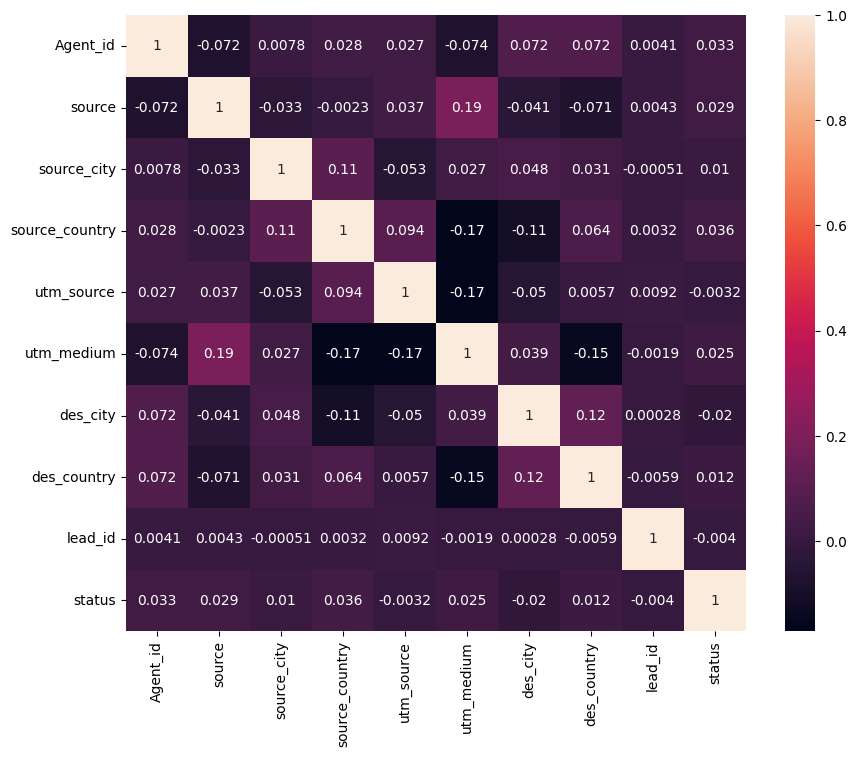

In [253]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(X.join(y).corr(method='pearson'), annot=True)
plt.show()

/tmp/ipykernel_82098/2824270293.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


[[8615   30]
 [ 581   38]]


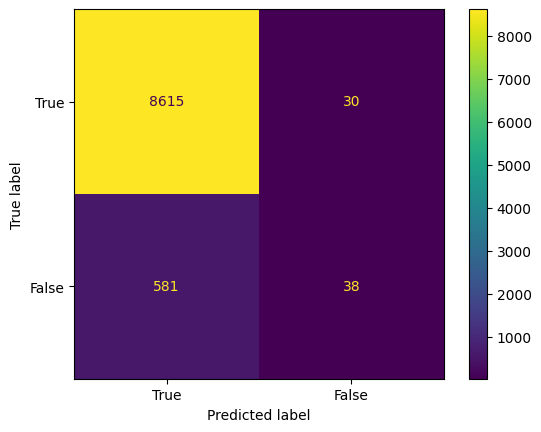

In [254]:
from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import f1_score
# from sklearn.metrics import precision_score
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)
# print(getMAE(X_train, X_test, y_train, y_test, model))
# print(getAccuracy(X_train, X_test, y_train, y_test, model))
# print(getPrecision(X_train, X_test, y_train, y_test, model))
# print(getRecall(X_train, X_test, y_train, y_test, model))
# print(getF1_score(X_train, X_test, y_train, y_test, model))

confusion_matrix = getmatrix(X_train, X_test, y_train, y_test, model)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=['True','False'])

print(confusion_matrix)
cm_display.plot()
plt.show() 



In [255]:
TP = confusion_matrix[0][0]
TN = confusion_matrix[1][1]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]

Accuracy = (TP + TN)/(TP + TN + FP + FN)
print(Accuracy)
Precison = TP/(TP+FP)
print(Precison)
Recall = TP/(TP+FN)
print(Recall)
F1_score = (2*Precison*Recall)/(Precison + Recall)
print(F1_score)

0.9340457685664939
0.9965297860034702
0.936820356676816
0.9657530407488369


In [256]:
def getmatrix(X_train, X_test, y_train, y_test, model):
    
    preds = model.predict(X_test)
    return confusion_matrix(y_test, preds)